<a href="https://colab.research.google.com/github/GaMasterPro/Dirty-Cafe-Sales/blob/main/Dirty_Cafe_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Import and Analysis**

In [2]:
import pandas as pd

df = pd.read_csv("dirty_cafe_sales.csv")
print(df.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [ ]:
print(df.info())
print("------------------")
print(df.describe())
print("------------------")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None
------------------
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Lo

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns
print(numerical)
print("----------------------")
print(categorical)

Index([], dtype='object')
----------------------
Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


# **Data Cleaning and Visualization**

In [ ]:
true_numerical = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in true_numerical:
  df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB
None


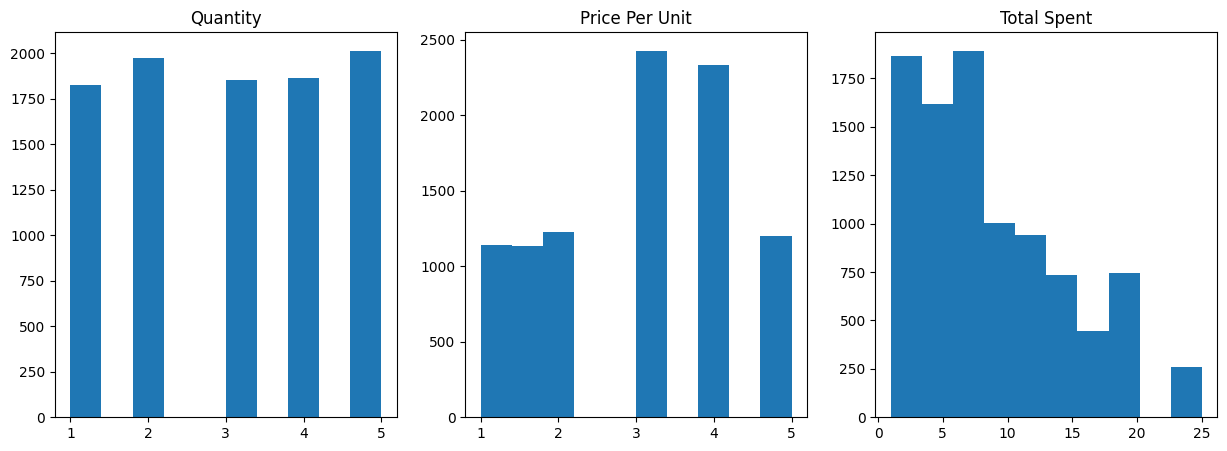

In [ ]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize = (15, 5))
axis[0].hist(df['Quantity'])
axis[0].set_title("Quantity")

axis[1].hist(df['Price Per Unit'])
axis[1].set_title("Price Per Unit")

axis[2].hist(df['Total Spent'])
axis[2].set_title("Total Spent")

plt.show()

<Axes: ylabel='Quantity'>

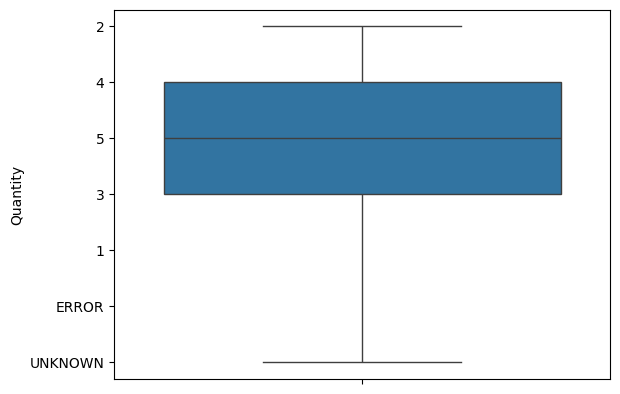

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y = df['Quantity'])


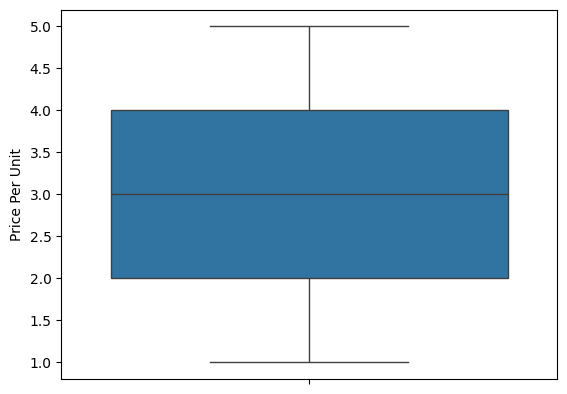

In [ ]:
sns.boxplot(y = df['Price Per Unit'])
plt.show()

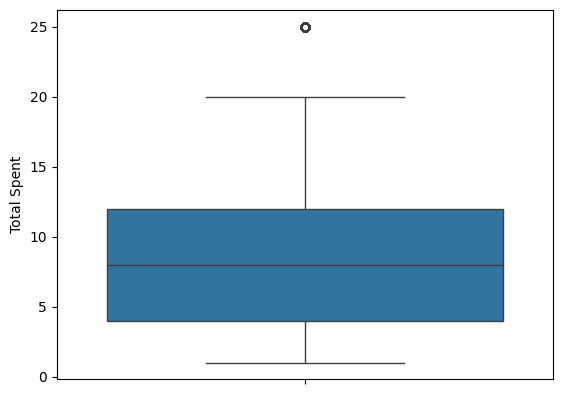

In [ ]:
sns.boxplot(y = df['Total Spent'])
plt.show()

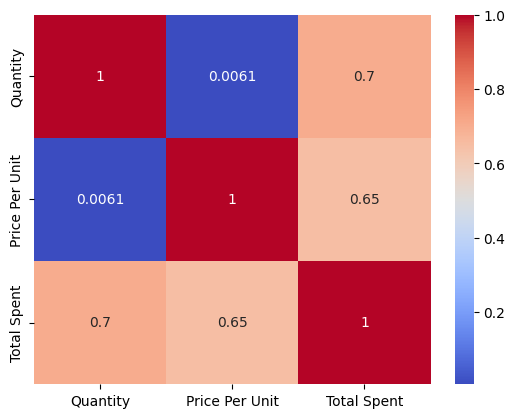

In [ ]:
numerical = ['Quantity', 'Price Per Unit', 'Total Spent']
df_num = df[numerical]
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

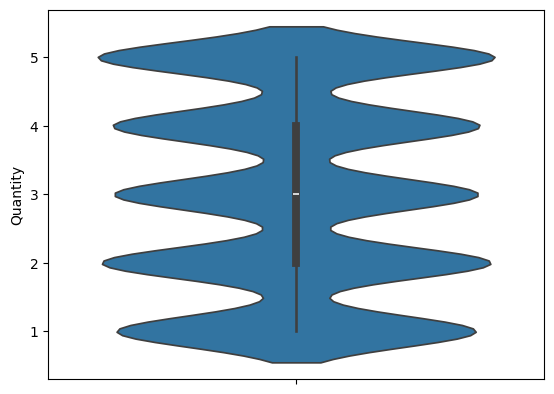

In [ ]:
sns.violinplot(df['Quantity'])
plt.show()

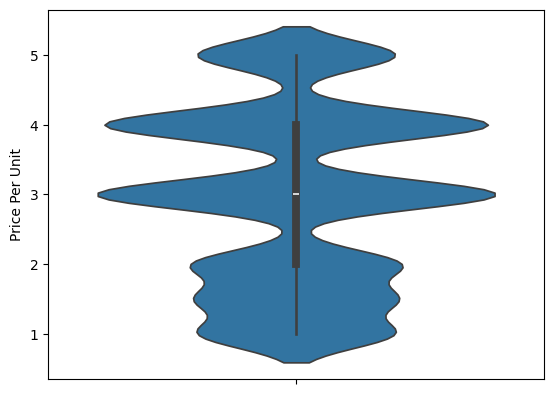

In [ ]:
sns.violinplot(df['Price Per Unit'])
plt.show()

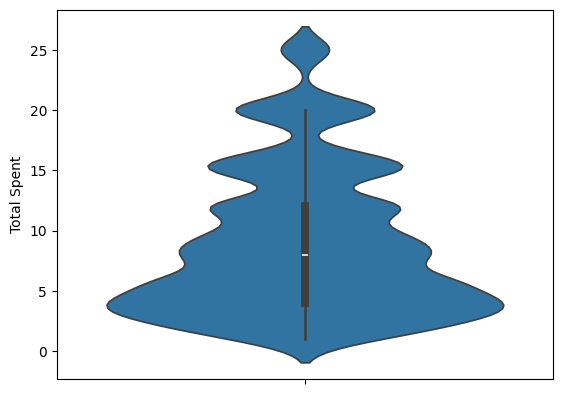

In [ ]:
sns.violinplot(df['Total Spent'])
plt.show()

In [ ]:
df = pd.read_csv("dirty_cafe_sales.csv")
categorical = ['Payment Method', 'Item', 'Transaction ID', 'Location']
df_cat = df[categorical]

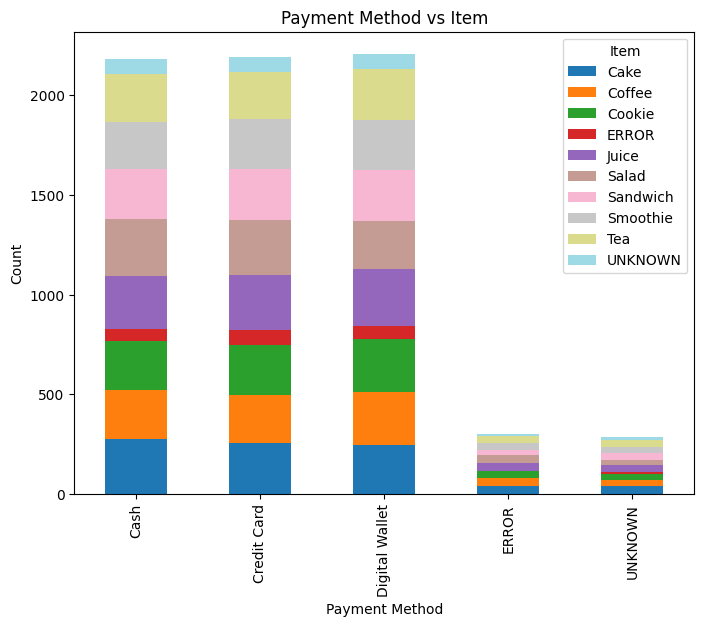

In [ ]:
cross_tab = pd.crosstab(df_cat['Payment Method'], df['Item'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,6), colormap='tab20')
plt.title("Payment Method vs Item")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

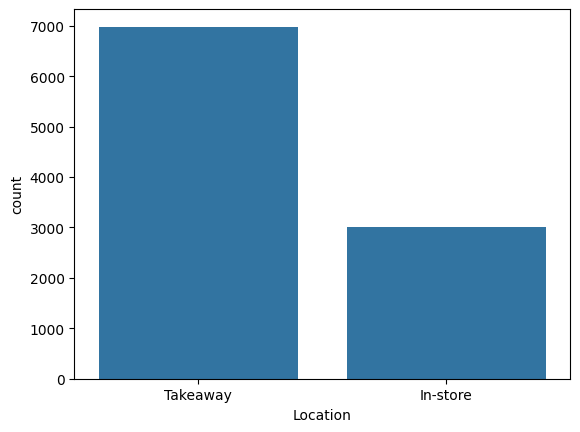

In [ ]:
sns.countplot(x='Location', data=df_cat)
plt.show()

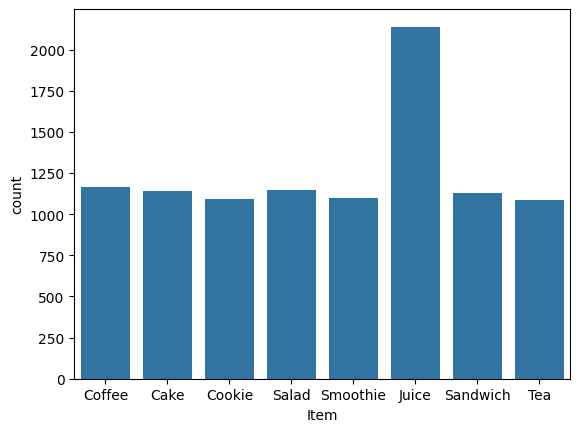

In [ ]:
sns.countplot(x='Item', data=df_cat)
plt.show()

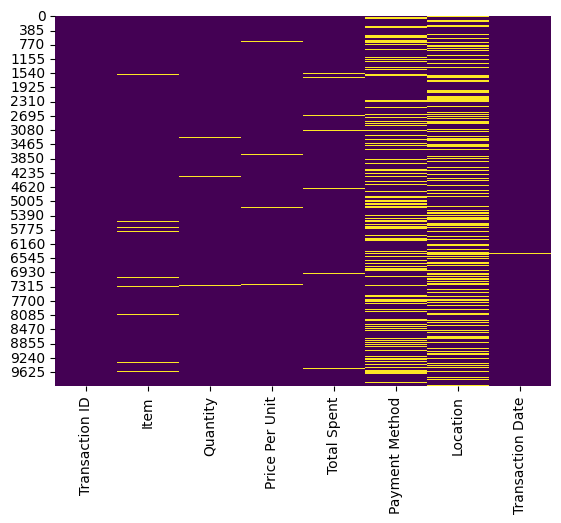

In [4]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

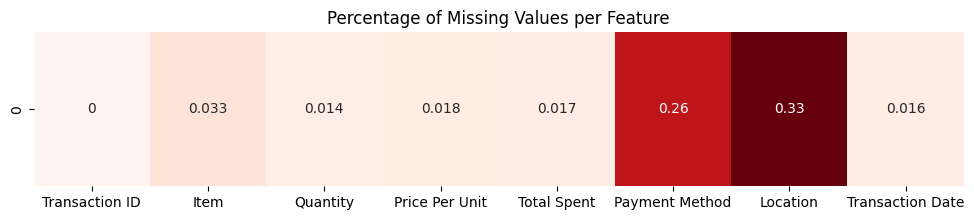

In [5]:
missing_percent = df.isnull().mean().to_frame().T

plt.figure(figsize=(12,2))
sns.heatmap(missing_percent, annot=True, cmap="Reds", cbar=False)
plt.title("Percentage of Missing Values per Feature")
plt.show()

In [ ]:
numerical = ['Quantity', 'Price Per Unit', 'Total Spent']
categorical = ['Payment Method', 'Location', 'Transaction ID', 'Item']
invalid = ['ERROR', 'UNKNOWN']
for col in numerical:
  df[col] = df[col].replace(invalid, pd.NA)
  df[col] = df[col].fillna(df[col].mean())

for col in categorical:
  df[col] = df[col].replace(invalid, pd.NA)
  df[col] = df[col].fillna(df[col].mode()[0])

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
mean_date = df['Transaction Date'].mean()
df['Transaction Date'] = df['Transaction Date'].fillna(mean_date)

df["Day"] = df["Transaction Date"].dt.day
df["Month"] = df["Transaction Date"].dt.month
df["Year"] = df["Transaction Date"].dt.year

df = df.drop(columns=['Transaction Date'])

print(df.head())

  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee       2.0             2.0     4.000000   
1    TXN_4977031    Cake       4.0             3.0    12.000000   
2    TXN_4271903  Cookie       4.0             1.0     8.924352   
3    TXN_7034554   Salad       2.0             5.0    10.000000   
4    TXN_3160411  Coffee       2.0             2.0     4.000000   

   Payment Method  Location  Day  Month  Year  
0     Credit Card  Takeaway    8      9  2023  
1            Cash  In-store   16      5  2023  
2     Credit Card  In-store   19      7  2023  
3  Digital Wallet  Takeaway   27      4  2023  
4  Digital Wallet  In-store   11      6  2023  


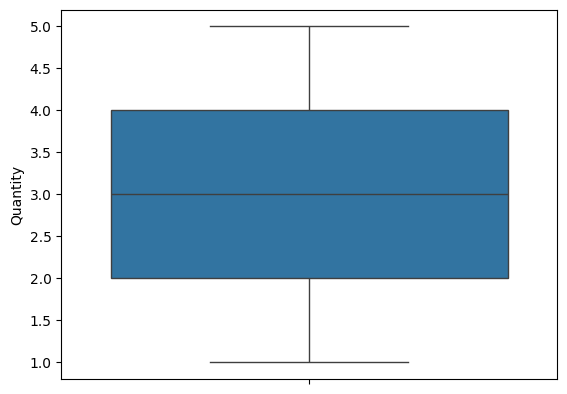

In [ ]:
sns.boxplot(y = df['Quantity'])
plt.show()


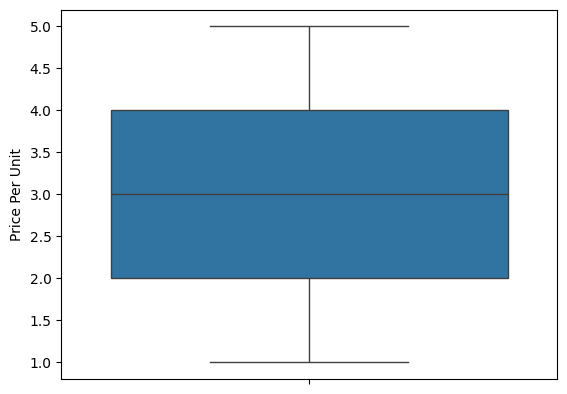

In [ ]:
sns.boxplot(y = df['Price Per Unit'])
plt.show()

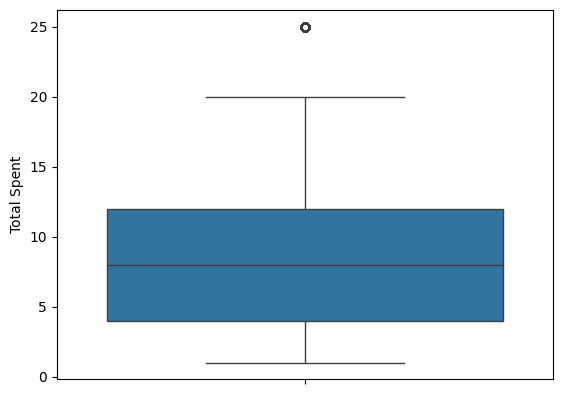

In [ ]:
sns.boxplot(y = df['Total Spent'])
plt.show()

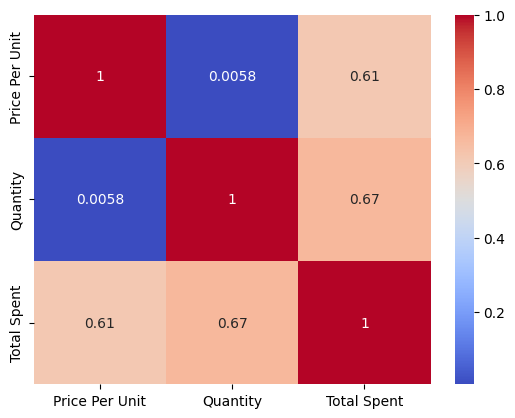

In [ ]:
numerical = ['Price Per Unit', 'Quantity', 'Total Spent']
df_num = df[numerical]
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

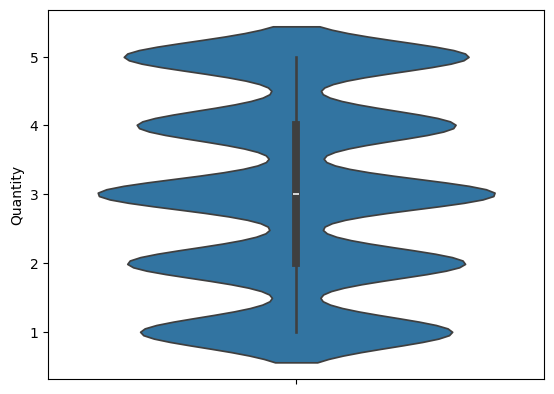

In [ ]:
sns.violinplot(df['Quantity'])
plt.show()

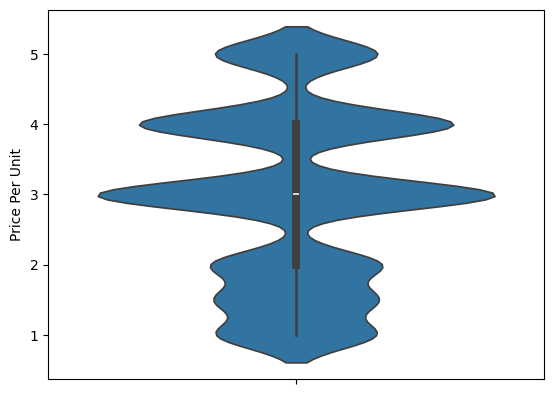

In [ ]:
sns.violinplot(df['Price Per Unit'])
plt.show()

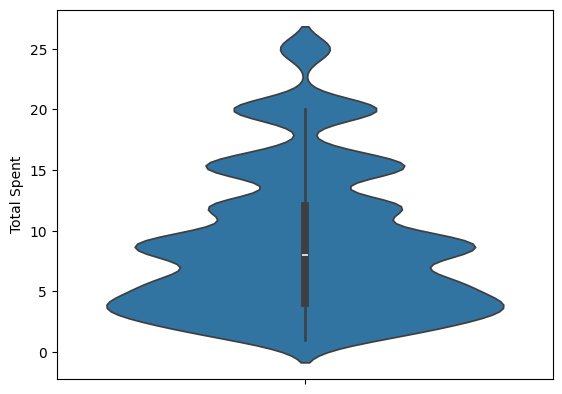

In [ ]:
sns.violinplot(df['Total Spent'])
plt.show()

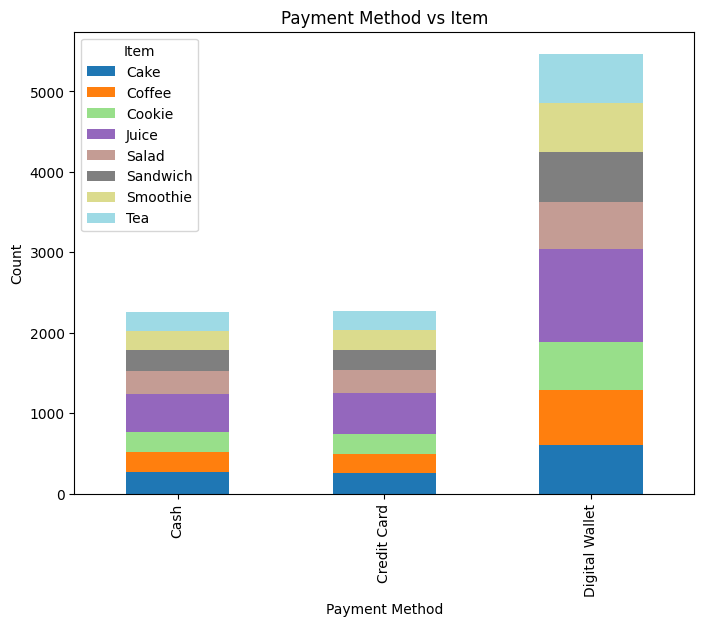

In [ ]:

categorical = ['Item', 'Payment Method', 'Location']
df_cat = df[categorical]


cross_tab = pd.crosstab(df_cat['Payment Method'], df['Item'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,6), colormap='tab20')
plt.title("Payment Method vs Item")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

# **MACHINE LEARNING**

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

le = preprocessing.LabelEncoder()

df['Item'] = le.fit_transform(df['Item'])
df['Payment Method'] = le.fit_transform(df['Payment Method'])
df['Location'] = le.fit_transform(df['Location'])


X  = df.drop(columns=['Item'])
y = df['Item']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [20, 30, 40],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [20, 30, 40],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

In [ ]:
results = {}
for name, mp in models.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[name] = {
        'Best Params': grid.best_params_,
        'Test Accuracy': acc
    }

for model_name, info in results.items():
    print(f"{model_name} -> Best Params: {info['Best Params']}, Test Accuracy: {info['Test Accuracy']:.4f}")

DecisionTree -> Best Params: {'max_depth': 5, 'min_samples_split': 10}, Test Accuracy: 0.6635
RandomForest -> Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 40}, Test Accuracy: 0.6880
GradientBoosting -> Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 20}, Test Accuracy: 0.6865
